### Frozen Lake
Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted.

If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following

                SFFF
                FHFH
                FFFH
                HFFG
S : starting point, safe

F : frozen surface, safe

H : hole, fall to your doom

G : goal, where the frisbee is located

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

## Part 0: Explore the environment
We begin by importing the necessary packages.

In [1]:
import gym
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Next, to create our environment, we just call gym.make() and pass a string of the name of the environment we want to set up. We'll be using the environment FrozenLake-v0.

In [2]:
env = gym.make('FrozenLake-v0')

The agent moves through a  4×4  gridworld, with states numbered as follows:

SFFF       
FHFH       
FFFH       
HFFG       

The agent has 4 potential actions:

UP = 0

RIGHT = 1

DOWN = 2

LEFT = 3


In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(16)


## Q-learning

Let's introduce the Q-learning algorithm

<figure>
<center>
<img src='https://neuro.bstu.by/ai/To-dom/My_research/Papers-2.1-done/RL/0/Ref/6_5%20Q-Learning%20Off-Policy%20TD%20Control.files/pseudotmp9.png' />
<figcaption></figcaption></center>
</figure>

The agent will select its actions according to the ε-greedy policy . The agent must find a trade-off between exploration and exploitation. The ε-greedy is a strategy that allows the agent to find an equilibrium between exploration and exploitation.

 The idea of ε-greedy is simple. Every time the agent selects an action, there is ε probability that the action will be selected randomly, and (1-ε) to select an action that maximizes the return. Initially, we start with a high value of ε to encourage the exploration of all possible actions, and then, we decrease ε slowly by multiplying it by a decay rate. ε decreases until it hits a minimum value. A low value of ε means that the agent will favor exploitation and will select the actions that will lead to the highest return.

Now, we’re going to create and initialize all the parameters needed to implement the Q-learning algorithm.

In [4]:
epsilon = 0.9              # the initial value of ε used by the ε-greedy strategy
min_epsilon = 0.01         # the minimum value epsilon can reach
decay_rate = 0.9           # the rate by which we decrease epsilon
total_episodes = 10000     # number of training episodes 
max_steps = 100            # maximum number of steps in one episode
learning_rate = 0.81       # the learning rate for the q-learning algorithm
gamma = 0.96               # the discount factor

We’re now going to construct our Q-table, and initialize all the Q-values to zero for each state-action pair.

In [5]:
Q = np.zeros([env.observation_space.n,env.action_space.n])

In [6]:
from utils import choose_action, learn

In [8]:
score = []
for episode in range(total_episodes):
  obs = env.reset()
  t = 0
  if episode % 100 == 99:
    epsilon *= decay_rate
    epsilon = max(epsilon, min_epsilon)
  while t < max_steps:
    action = choose_action(obs, Q, env, epsilon)
    obs2, reward, done, info = env.step(action)
    learn(obs, obs2, reward, action, Q, learning_rate, gamma)
    obs = obs2
    t += 1
    if done:
      score.append(reward)
      if reward > 0.0:
        print("Win")
      else:
        print("Lose")
      break

Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Los

Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Win
Lose
Win
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Win
Win
Win
Lose
Lose
Lose
Win
Lose
Win
Lose
Win
Lose
Lose
Win
Lose
Win
Lose
Lose
Lose
Win
Win
Lose
Win
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Win
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose


Lose
Win
Win
Win
Win
Win
Lose
Win
Win
Lose
Lose
Lose
Win
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Win
Win
Win
Win
Lose
Lose
Win
Win
Lose
Lose
Win
Win
Lose
Lose
Win
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Win
Win
Win
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Win
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Win
Win
Lose
Lose
Win
Lose
Win
Lose
Lose
Lose
Win
Lose
Win
Lose
Win
Lose
Win
Lose
Lose
Lose
Lose
Win
Win
Win
Lose
Win
Win
Lose
Lose
Lose
Lose
Lose
Win
Lose
Win
Lose
Win
Lose
Win
Lose
Win
Win
Lose
Win
Lose
Lose
Win
Win
Lose
Win
Win
Lose
Win
Win
Lose
Lose
Win
Lose
Lose
Lose
Win
Win
Lose
Lose
Win
Win
Lose
Lose
Lose
Lose
Win
Win
Win
Lose
Win
Win
Win
Win
Lose
Win
Win
Win
Lose
Win
Lose
Win
Win
Lose
Lose
Lose
Lose
Win
Win
Lose
Lose
Lose
Lose
Win
Win
Lose
Lose
Lose
Win
Win
Win
Win
Lose
Lose
Win
Win
Lose
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Lose
Win
Win
Lose
Lose
Lose
Lo

Win
Win
Win
Lose
Lose
Win
Win
Win
Lose
Win
Lose
Win
Lose
Lose
Win
Lose
Win
Lose
Win
Lose
Lose
Win
Win
Lose
Lose
Win
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Win
Win
Win
Lose
Win
Lose
Win
Lose
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Lose
Win
Win
Lose
Lose
Win
Win
Lose
Win
Lose
Win
Win
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Win
Lose
Lose
Win
Win
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Win
Lose
Lose
Win
Win
Lose
Win
Win
Win
Win
Lose
Lose
Win
Win
Win
Lose
Win
Win
Lose
Win
Win
Win
Lose
Win
Win
Win
Lose
Lose
Win
Win
Win
Lose
Win
Win
Win
Lose
Win
Lose
Lose
Lose
Win
Lose
Lose
Win
Lose
Win
Win
Win
Lose
Win
Lose
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Lose
Lose
Win
Win
Lose
Lose
Lose
Win
Lose
Win
Lose
Lose
Lose
Win
Lose
Win
Win
Lose
Lose
Win
Lose
Lose
Lose
Lose
Win
Win
Win
Lose
Lose
Lose
Win
Win
Win
Win
Lose
Win
Win
Lose
Lose
Win
Lose
Lose
Lose
Lose
Win
Win
Win


Win
Lose
Win
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Win
Lose
Lose
Win
Lose
Lose
Lose
Win
Lose
Lose
Lose
Lose
Win
Lose
Lose
Lose
Win
Lose
Lose
Lose
Win
Lose
Win
Lose
Win
Win
Win
Lose
Win
Win
Lose
Lose
Win
Lose
Lose
Lose
Win
Lose
Win
Lose
Lose
Lose
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Lose
Win
Win
Lose
Lose
Lose
Win
Win
Win
Win
Win
Lose
Lose
Lose
Lose
Lose
Win
Win
Win
Win
Win
Win
Lose
Lose
Win
Win
Win
Win
Win
Lose
Win
Lose
Win
Lose
Win
Lose
Lose
Lose
Win
Win
Win
Lose
Win
Win
Lose
Win
Lose
Lose
Lose
Lose
Win
Lose
Lose
Win
Win
Lose
Win
Win
Lose
Lose
Win
Lose
Win
Lose
Win
Lose
Lose
Win
Win
Win
Lose
Lose
Lose
Win
Win
Win
Win
Lose
Win
Lose
Win
Lose
Lose
Lose
Win
Lose
Lose
Win
Win
Lose
Lose
Lose
Win
Win
Win
Win
Lose
Win
Win
Win
Lose
Lose
Win
Win
Lose
Win
Win
Lose
Win
Lose
Win
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Win
Win
Win
Lose
Lose
Win
Win
Win
Win
Lose
Win
Win
Lose
Lose
Win
Lose
Win
Lose
Win
Win
Lose
Lose
Lose
Lose
Win
Win
Lose
Win
Win
Win
Lose
Lose
Win
Win
Win
Win
Lose
Lose
Lose
Lose
Lose

Lose
Lose
Lose
Lose
Lose
Win
Win
Win
Win
Lose
Lose
Win
Win
Lose
Lose
Win
Win
Lose
Lose
Lose
Win
Win
Win
Lose
Win
Lose
Lose
Win
Win
Lose
Lose
Lose
Lose
Win
Win
Lose
Win
Lose
Lose
Win
Lose
Lose
Lose
Lose
Lose
Lose
Lose
Win
Lose
Win
Lose
Win
Lose
Win
Lose
Win
Lose
Lose
Lose
Lose
Win
Win
Lose
Lose
Lose
Lose
Lose
Win
Lose
Win
Win
Lose
Lose
Win
Lose
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Lose
Lose
Win
Lose
Win
Win
Lose
Win
Win
Lose
Lose
Lose
Win
Win
Lose
Win
Win
Lose
Lose
Lose
Win
Win
Lose
Win
Win
Lose
Win
Win
Win
Win
Win
Lose
Win
Lose
Win
Win
Win
Win
Lose
Lose
Lose
Lose
Win
Win
Lose
Win
Win
Lose
Win
Lose
Lose
Lose
Win
Lose
Win
Lose
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Lose
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Lose
Lose
Win
Win
Win
Lose
Win
Win
Lose
Lose
Lose
Lose
Lose
Win
Lose
Lose
Win
Lose
Win
Win
Lose
Win
Win
Win
Lose
Win
Win
Lose
Win
Win
Lose
Win
Win
Lose
Lose
Win
Win
Lose
Win
Win
Lose
Win
Lose
Win
Win
Lose
Lose
Win
Lose
Lose
Lose
Lose
Win
Lose
Win
Lose
Win
Win

No handles with labels found to put in legend.


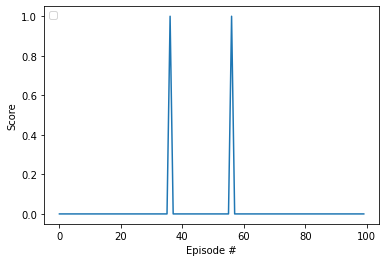

In [15]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(100), score[:100])
#plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()